# Fake News Classification

#### Fake news classification is a process that involves analyzing news content to determine its truthfulness. The ultimate goal of this project is to build a reliable and efficient algorithm that can accurately classify news articles as either fake or genuine, and thus help users make informed decisions when consuming information online. In this we use different machine learning models to classify the news.



#### Dataset: https://www.kaggle.com/datasets/bhavikjikadara/fake-news-detection

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string
from sklearn.metrics import accuracy_score

import warnings 
warnings.filterwarnings('ignore')

C:\Users\laksh\AppData\Local\Temp\ipykernel_7068\3159627604.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Importing Dataset

In [2]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

In [3]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


## Inserting a column "class" as target feature

In [5]:
df_fake["class"] = 0
df_true["class"] = 1

In [6]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

In [7]:
# Removing last 10 rows for manual testing
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470,-1):
    df_fake.drop([i], axis = 0, inplace = True)
    
    
df_true_manual_testing = df_true.tail(10)
for i in range(21416,21406,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [8]:
df_fake.shape, df_true.shape

((23471, 5), (21407, 5))

In [9]:
df_fake_manual_testing["class"] = 0
df_true_manual_testing["class"] = 1

In [10]:
df_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [11]:
df_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [12]:
df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)
df_manual_testing.to_csv("manual_testing.csv")

## Merging True and Fake Dataframes

In [13]:
df_merge = pd.concat([df_fake, df_true], axis =0 )
df_merge.sample(10)

,title,text,subject,date,class
6902,Top U.S. Marine's wish-list for Trump goes wel...,WASHINGTON (Reuters) - U.S. Marine Corps Comma...,politicsNews,"December 5, 2016",1
16629,Suicide risk torture victim can be deported: E...,LUXEMBOURG (Reuters) - European governments ca...,worldnews,"October 24, 2017",1
13188,MELANIA PUNCHES BACK…HARD…After Leftist Public...,They had no basis for publishing their article...,politics,"Aug 23, 2016",0
9950,Puerto Rico creditors cancel lawsuit after gov...,SAN JUAN (Reuters) - - Creditors of Puerto Ric...,politicsNews,"April 13, 2016",1
22934,Boiler Room #102 – Tales From The Black Pill,Tune in to the Alternate Current Radio Network...,Middle-east,"March 24, 2017",0
5976,Trump says he wants to cut Navy submarines' pr...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"January 27, 2017",1
13722,FATHER SPEAKS OUT After Son Was Attacked By Mo...,"After being assaulted by Trump haters, the Tru...",politics,"Jun 10, 2016",0
1867,McConnell to support Trump-Democratic deal on ...,WASHINGTON (Reuters) - U.S. Senate Majority Le...,politicsNews,"September 6, 2017",1
11919,OOPS! UKRAINE Caught Colluding With Democrats ...,Donald Trump wasn t the only presidential cand...,politics,"Jan 13, 2017",0
19323,U.S. special envoy says Kurdish referendum has...,NEW YORK (Reuters) - The U.S. presidential env...,worldnews,"September 22, 2017",1


In [14]:
df_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

## Removing columns which are not required

In [15]:
df = df_merge.drop(["title", "subject","date"], axis = 1)

In [16]:
df.isnull().sum()

text     0
class    0
dtype: int64

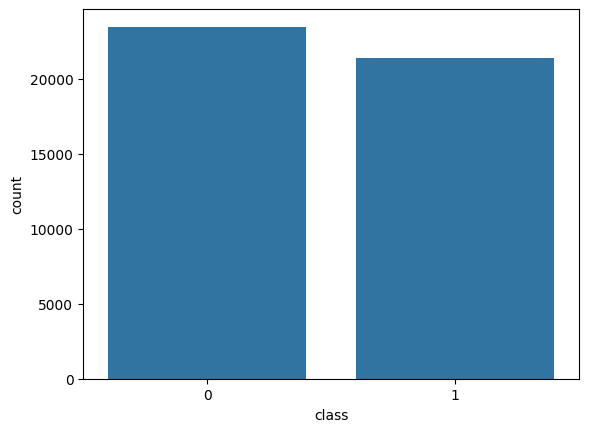

In [17]:
sns.countplot(x=df['class'])
plt.show()

## Random Shuffling the dataframe

In [18]:
df = df.sample(frac = 1)

In [19]:
df.head()

,text,class
16980,SOCHI/MOSCOW (Reuters) - President Vladimir Pu...,1
1522,(This version of the Sept. 20 story corrects ...,1
20482,"Barack Obama s legacy will be a divided, lawle...",0
20848,LUXEMBOURG/BRUSSELS (Reuters) - The EU s highe...,1
5288,WASHINGTON (Reuters) - President Donald Trump’...,1


In [20]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [21]:
df.columns

Index(['text', 'class'], dtype='object')

In [22]:
df.head()

,text,class
0,SOCHI/MOSCOW (Reuters) - President Vladimir Pu...,1
1,(This version of the Sept. 20 story corrects ...,1
2,"Barack Obama s legacy will be a divided, lawle...",0
3,LUXEMBOURG/BRUSSELS (Reuters) - The EU s highe...,1
4,WASHINGTON (Reuters) - President Donald Trump’...,1


## Creating a function to process the texts

In [23]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [24]:
df["text"] = df["text"].apply(wordopt)

## Defining dependent and independent variables

In [25]:
x = df["text"]
y = df["class"]

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

## Splitting Training and Testing

## Convert text to vectors

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

## Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train,y_train)
print('train score: ',LR.score(xv_train,y_train)*100)

train score:  99.14730524689524


In [29]:
pred_lr=LR.predict(xv_test)

In [30]:
LR_accuracy= LR.score(xv_test, y_test)
print("Accuracy:", LR_accuracy*100)

Accuracy: 98.64527629233511


In [31]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5874
           1       0.99      0.99      0.99      5346

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



## Decision Tree Classification

In [32]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)
print('train score: ',DT.score(xv_train,y_train)*100)

train score:  99.99702893814249


In [33]:
pred_dt = DT.predict(xv_test)

In [34]:
DT_accuracy = DT.score(xv_test, y_test)
print("Accuracy:", DT_accuracy*100)

Accuracy: 99.57219251336899


In [35]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5874
           1       1.00      1.00      1.00      5346

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



## Gradient Boosting Classifier

In [36]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)
print('train score: ',GBC.score(xv_train,y_train)*100)

train score:  99.6939806286767


In [37]:
pred_gbc = GBC.predict(xv_test)

In [38]:
GBC_accuracy= GBC.score(xv_test, y_test)
print("Accuracy:", GBC_accuracy*100)

Accuracy: 99.57219251336899


In [39]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5874
           1       0.99      1.00      1.00      5346

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



## Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)
print('train score: ',RFC.score(xv_train,y_train)*100)

train score:  99.99702893814249


In [41]:
pred_rfc = RFC.predict(xv_test)

In [42]:
RFC_accuracy = RFC.score(xv_test, y_test)
print("Accuracy:", RFC_accuracy*100)

Accuracy: 98.87700534759358


In [43]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5874
           1       0.99      0.99      0.99      5346

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



## Model Testing

In [44]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]),                                                                                                       output_lable(pred_DT[0]), 
                                                                                                              
                                                                                                        output_lable(pred_GBC[0]), 
                                                                                                              output_lable(pred_RFC[0])))

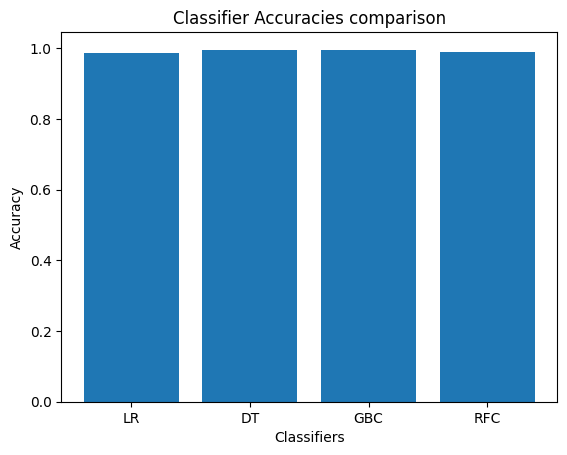

In [45]:
# Define the names of classifiers and their corresponding accuracy scores
classifiers = ['LR', 'DT', 'GBC', 'RFC']
accuracies = [LR_accuracy, DT_accuracy, GBC_accuracy, RFC_accuracy]

plt.bar(classifiers, accuracies)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracies comparison')
plt.show()

In [46]:
news = str(input())
manual_testing(news)

 Paul Craig RobertsIn the last years of the 20th century fraud entered US foreign policy in a new way.  On false pretenses Washington dismantled Yugoslavia and Serbia in order to advance an undeclared agenda. In the 21st century this fraud multiplied many times. Afghanistan, Iraq, Somalia, and Libya were destroyed, and Iran and Syria would also have been destroyed if the President of Russia had not prevented it.  Washington is also behind the current destruction of Yemen, and Washington has enabled and financed the Israeli destruction of Palestine.  Additionally, Washington operated militarily within Pakistan without declaring war, murdering many women, children, and village elders under the guise of  combating terrorism.  Washington s war crimes rival those of any country in history.I have documented these crimes in my columns and books (Clarity Press). Anyone who still believes in the purity of Washington s foreign policy is a lost soul  Russia and China now have a strategic alliance



LR Prediction: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction: Fake News


In [ ]:
news = str(input())
manual_testing(news)